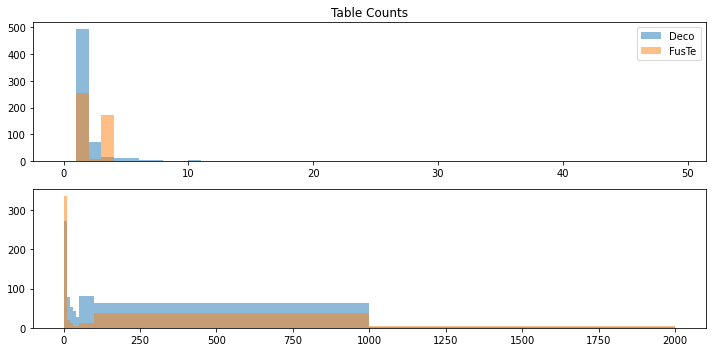

In [1]:
from os import listdir
from os.path import exists, join
import json
import matplotlib.pyplot as plt
from statistics import mean


DATA_PATH = "../data"
OUTPUT_PATH = "../improved_output/output"
EXPERIMENT = "CrossValidationTraining"
DATASETS= ["Deco", "FusTe"]


refined_data = {}
for dataset in DATASETS:
    refined_file_path = join(DATA_PATH, dataset, "refined.json")
    with open(refined_file_path) as f:
        refined_data[dataset] = json.load(f)

def is_multi_key(key, dataset):
    return refined_data[dataset][key]["table_count"] > 2        
    
def aggregate_from_refined(dataset, key):
    aggregated = []
    for file, data in refined_data[dataset].items():
        aggregated.append(data[key])
    return aggregated

fig, (ax1, ax2) = plt.subplots(2, figsize=(10,5))
for dataset in DATASETS:
    edge_counts = aggregate_from_refined(dataset, "edge_count")
    table_counts = aggregate_from_refined(dataset, "table_count")

    ax1.hist(table_counts, label=dataset, alpha=0.5, bins=range(50))
    ax2.hist(edge_counts, label=dataset, alpha=0.5, bins=[0, 10, 20, 30, 40, 50, 100, 1000, 2000])


ax1.set_title("Table Counts")
ax1.legend()
fig.tight_layout()

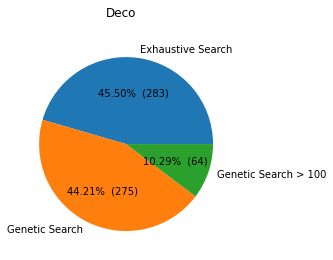

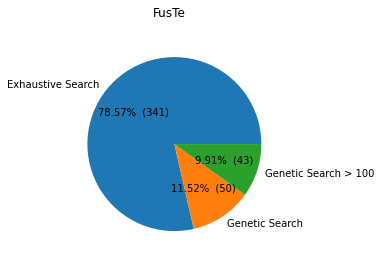

In [2]:
import matplotlib.pyplot as plt

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

for dataset in DATASETS:
    total_files = 0
    multi_table_files = 0
    single_table_files = 0
    exhausitve = 0
    genetic_easy = 0
    genetic_hard = 0
    for file, data in refined_data[dataset].items():
        total_files += 1
        if data["table_count"] == 1:
            single_table_files += 1
        else:
            multi_table_files += 1
        
        if data["edge_count"] <= 10:
            exhausitve += 1
        elif 10 < data["edge_count"] <= 100:
            genetic_easy += 1
        else:
            genetic_hard += 1
    
    # fig, (ax1, ax2) = plt.subplots(2)
    # ax1.pie([single_table_files, multi_table_files], labels=["Single Table Files", "Multi Table Files"])
    plt.pie(
        [exhausitve, genetic_easy, genetic_hard],
        labels=["Exhaustive Search", "Genetic Search", "Genetic Search > 100"],
        rotatelabels=False,
        autopct=make_autopct([exhausitve, genetic_easy, genetic_hard]),
    )
    plt.suptitle(dataset)
    
    plt.show()

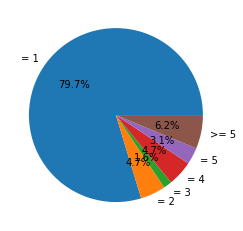

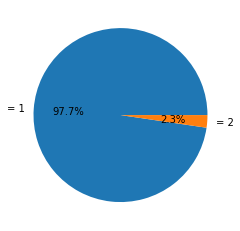

In [3]:
import matplotlib.pyplot as plt


for dataset in DATASETS:
    counts = []
    for file, data in refined_data[dataset].items():
        
        if data["edge_count"] > 100:
            counts.append(data["table_count"])
                
    tc_1 = counts.count(1)
    tc_2 = counts.count(2)
    tc_3 = counts.count(3)
    tc_4 = counts.count(4)
    tc_5 = counts.count(5)
    tc_a = len([c for c in counts if c > 5])
    # fig, (ax1, ax2) = plt.subplots(2)
    # ax1.pie([single_table_files, multi_table_files], labels=["Single Table Files", "Multi Table Files"])
    
    results = [tc_1, tc_2, tc_3, tc_4, tc_5, tc_a]
    labels = ["= 1", "= 2", "= 3", "= 4", "= 5", ">= 5"]
    d = dict(zip(labels, results))
    bad_keys = []
    for k,v  in d.items():
        if v == 0:
            bad_keys.append(k)
    for k in bad_keys:
        del d[k]
    
    plt.pie(
        d.values(),
        labels=d.keys(),
        rotatelabels=False,
        autopct='%1.1f%%',
    )
    # plt.suptitle(dataset)
    plt.show()

In [4]:
# len(b_10[0] + b_10_100[0] + a_100[0])

In [5]:
len(b_10[1] + b_10_100[1] + a_100[1])

NameError: name 'b_10' is not defined

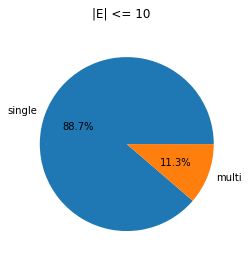

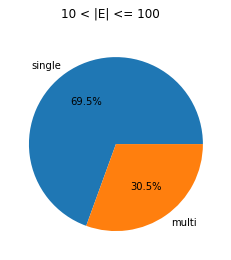

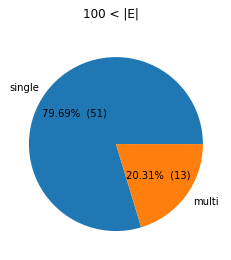

In [7]:
import matplotlib.pyplot as plt


for dataset in ["Deco"]:
    b_10 = [[], []]
    b_10_100 = [[], []]
    a_100 = [[], []]
    for file, data in refined_data[dataset].items():
        
        if data["edge_count"] <= 10:
            if data["table_count"] == 1:
                b_10[0].append(file)
            else:
                b_10[1].append(file)
        if data["edge_count"] > 100:
            if data["table_count"] == 1:
                a_100[0].append(file)
            else:
                a_100[1].append(file)
                
        if 10 < data["edge_count"] <= 100:
            if data["table_count"] == 1:
                b_10_100[0].append(file)
            else:
                b_10_100[1].append(file)
        
    d = {
        "single": len(b_10[0]),
        "multi": len(b_10[1]),
    }
    
    plt.pie(
        d.values(),
        labels=d.keys(),
        rotatelabels=False,
        autopct='%1.1f%%',
    )
    plt.suptitle("|E| <= 10")
    plt.show()           

    
    d = {
        "single": len(b_10_100[0]),
        "multi": len(b_10_100[1]),
    }
    
    plt.pie(
        d.values(),
        labels=d.keys(),
        rotatelabels=False,
        autopct='%1.1f%%',
    )
    plt.suptitle("10 < |E| <= 100")
    plt.show()
    
    d = {
        "single": len(a_100[0]),
        "multi": len(a_100[1]),
    }
    
    plt.pie(
        d.values(),
        labels=d.keys(),
        rotatelabels=False,
        autopct=make_autopct(d.values()),
    )
    plt.suptitle("100 < |E|")
    plt.show()